In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('data/data_fail.csv')
print(df.shape)
df.head()

(5489, 91)


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,100.0,9.784107e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,100.0,2.076417e-314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,100.0,6.394443e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,100.0,6.040397e-313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,100.0,1.019657e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_22_normalized', 'smart_22_raw', 'smart_183_normalized',
       'smart_183_raw', 'smart_184_normalized', 'smart_184_raw',
       'smart_187_normalized', 'smart_187_raw', 'smart_188_normalized',
       'smart_188_raw', 'smart_189_normalized', 'smart_189_raw',
       'smart_190_normalized', 'smart_190_raw', 'smart_191_normalized',
       'smart_191_raw', 'smart_192_normalized', 'smart_192_raw',
       'smart

In [72]:
failed_hdds = df.loc[df.failure==1]["serial_number"]
failed_hdds.describe()

count          214
unique         205
top       Z300GQAF
freq             2
Name: serial_number, dtype: object

In [73]:
fallas=df.loc[df.failure==1]

In [74]:
doble_falla=fallas.groupby("serial_number")['serial_number'].count().sort_values(ascending=False).head(9).index
doble_falla

Index(['Z300GQAF', 'W3006E5B', 'W300J9JA', 'Z300KHN0', 'Z3015V4D',
       'PL1311LAG2B1NH', 'Z300ZSJQ', 'Z300GYM0', 'Z3001J37'],
      dtype='object', name='serial_number')

In [75]:
registros_a_eliminar=[]
for i in doble_falla:
    aux=df['serial_number'].loc[df.serial_number==i][df.failure==1].index
    registros_a_eliminar.append(max(aux))
    print(aux)
print(registros_a_eliminar)

Int64Index([3525, 3649], dtype='int64')
Int64Index([153, 344], dtype='int64')
Int64Index([3415, 3539], dtype='int64')
Int64Index([106, 297], dtype='int64')
Int64Index([121, 312], dtype='int64')
Int64Index([3483, 3607], dtype='int64')
Int64Index([3468, 3592], dtype='int64')
Int64Index([3410, 3534], dtype='int64')
Int64Index([3453, 3577], dtype='int64')
[3649, 344, 3539, 297, 312, 3607, 3592, 3534, 3577]


In [76]:
for i in registros_a_eliminar:
    df=df.drop([i],axis=0)

In [77]:
failed_hdds = df.loc[df.failure==1]["serial_number"]
failed_hdds.describe()

count                205
unique               205
top       JK11E1B9K0M03T
freq                   1
Name: serial_number, dtype: object

In [78]:
#Crear una columna con el dia en que muere el articulo
df["end_date"] = df.groupby("serial_number")["date"].transform("max")
#Crear una columna con el dia en que existe el primer día de vida del articulo
df["start_date"] = df.groupby("serial_number")["date"].transform("min")
#Transformamos a fecha
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])
df["start_date"] = pd.to_datetime(df["start_date"])
#Tiempo de Vida util articulo
df["vida_util"] = df["end_date"] - df["start_date"]
#Tiempo de Vida util articulo en días(int)
df["vida_util_int"] = (df['vida_util'].astype('int64')/60**2)/24/1000000000.0
#Vida util que le queda al articulo
df["vida_util_restante"] = (df["end_date"] - df["date"])
#Vida util que le queda al articulo (int)
df["vida_util_restante_int"] = (df["vida_util_restante"].astype('int64')/60**2)/24/1000000000.0
#Vida util que le queda al articulo porcentual
df["vida_util_restante_porcentual"] = (df["vida_util_restante_int"]/df["vida_util_int"])

df_unique = df[df.failure==1]
df.head()


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_252_raw,smart_254_normalized,smart_254_raw,end_date,start_date,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-17,2016-01-01,16 days,16.0,16 days,16.0,1.0
1,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
2,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,2016-04-18,2016-01-01,108 days,108.0,108 days,108.0,1.0
3,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,2016-04-09,2016-01-01,99 days,99.0,99 days,99.0,1.0
4,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,2016-01-10,2016-01-01,9 days,9.0,9 days,9.0,1.0


In [79]:
df["vida_util_restante_porcentual"].describe()

count    5474.000000
mean        0.551788
std         0.397482
min         0.000000
25%         0.111111
50%         0.803922
75%         0.916667
max         1.000000
Name: vida_util_restante_porcentual, dtype: float64

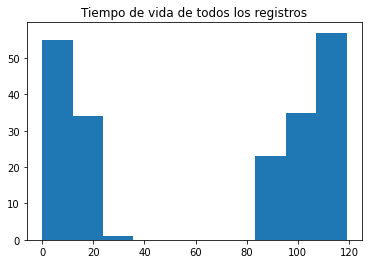

In [80]:
plt.hist(df_unique['vida_util_int'])#, bins=10
plt.title("Tiempo de vida de todos los registros", fontdict=None, loc='center', pad=None,)
plt.show()

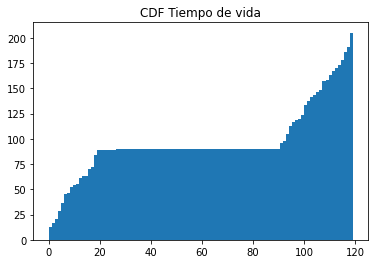

In [81]:
plt.hist(df_unique['vida_util_int'],cumulative=True ,bins=100)#, bins=10
plt.title("CDF Tiempo de vida", fontdict=None, loc='center', pad=None,)
plt.show()

In [82]:
df_last_weak    = df[df.vida_util_restante_int<=7]
df_last_2_weaks = df[df.vida_util_restante_int<=14]
df_last_month   = df[df.vida_util_restante_int<=30]

In [86]:
df_last_weak.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
count,1.420000e+03,1420.000000,1420.000000,1.420000e+03,174.000000,174.000000,1420.000000,1420.000000,1420.000000,1420.000000,...,1.140000e+02,114.0,1.140000e+02,130.000000,130.0,1420,1420.000000,1420,1420.000000,1414.000000
mean,1.560052e-311,0.144366,122.361268,9.407928e+07,109.775862,33.649425,103.017606,478.159155,99.999296,20.478873,...,1.638100e+08,1.0,7.534454e+07,106.153846,0.0,67 days 05:09:17.746478873,67.214789,3 days 05:11:19.436619718,3.216197,0.174614
std,0.000000e+00,0.351584,29.395144,8.922988e+07,14.888848,51.267158,20.430886,1362.507060,0.026537,64.371644,...,1.416254e+08,0.0,6.515013e+07,24.124503,0.0,48 days 03:08:44.594913550,48.131072,2 days 05:57:03.208775433,2.247954,0.269420
min,3.953828e-313,0.000000,46.000000,0.000000e+00,100.000000,0.000000,88.000000,0.000000,99.000000,1.000000,...,1.301933e+07,1.0,5.922033e+06,100.000000,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.000000,0.000000
25%,1.482490e-311,0.000000,111.000000,5.326934e+06,100.000000,0.000000,92.000000,0.000000,100.000000,5.000000,...,2.864684e+07,1.0,1.304813e+07,100.000000,0.0,12 days 00:00:00,12.000000,1 days 00:00:00,1.000000,0.018182
50%,1.976651e-311,0.000000,117.000000,8.127050e+07,100.000000,0.000000,97.000000,0.000000,100.000000,11.000000,...,9.894273e+07,1.0,4.536873e+07,100.000000,0.0,96 days 00:00:00,96.000000,3 days 00:00:00,3.000000,0.048544
75%,1.976651e-311,0.000000,119.000000,1.680634e+08,131.000000,100.000000,99.000000,0.000000,100.000000,20.000000,...,3.302250e+08,1.0,1.507307e+08,100.000000,0.0,110 days 00:00:00,110.000000,5 days 00:00:00,5.000000,0.222222
max,2.964974e-311,1.000000,200.000000,9.378436e+08,135.000000,163.000000,253.000000,8875.000000,100.000000,1056.000000,...,3.586770e+08,1.0,1.642626e+08,200.000000,0.0,119 days 00:00:00,119.000000,7 days 00:00:00,7.000000,1.000000


In [87]:
df_last_2_weaks.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
count,2.233000e+03,2233.000000,2233.000000,2.233000e+03,254.000000,254.000000,2233.000000,2233.000000,2233.000000,2233.000000,...,1.980000e+02,198.0,1.980000e+02,223.000000,223.0,2233,2233.000000,2233,2233.000000,2227.000000
mean,1.532793e-311,0.091805,123.207344,9.381951e+07,109.370079,31.677165,103.108374,482.733542,99.999552,19.319749,...,1.577985e+08,1.0,7.256413e+07,104.484305,0.0,71 days 13:03:31.195700851,71.544111,5 days 22:59:22.919838781,5.957904,0.219694
std,0.000000e+00,0.288815,29.812008,8.688757e+07,14.699253,49.729129,19.829377,1346.700779,0.021162,53.166151,...,1.435319e+08,0.0,6.600756e+07,20.742490,0.0,47 days 10:09:09.547383150,47.423027,4 days 05:10:11.947216745,4.215416,0.287621
min,3.953828e-313,0.000000,46.000000,0.000000e+00,100.000000,0.000000,88.000000,0.000000,99.000000,1.000000,...,1.103062e+07,1.0,5.016436e+06,100.000000,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.000000,0.000000
25%,9.883284e-312,0.000000,111.000000,5.105896e+06,100.000000,0.000000,92.000000,0.000000,100.000000,5.000000,...,2.645494e+07,1.0,1.204673e+07,100.000000,0.0,16 days 00:00:00,16.000000,2 days 00:00:00,2.000000,0.034483
50%,1.976651e-311,0.000000,117.000000,8.091726e+07,100.000000,0.000000,97.000000,0.000000,100.000000,11.000000,...,5.825342e+07,1.0,2.650250e+07,100.000000,0.0,101 days 00:00:00,101.000000,5 days 00:00:00,5.000000,0.085470
75%,1.976651e-311,0.000000,119.000000,1.676160e+08,131.000000,100.000000,99.000000,0.000000,100.000000,20.000000,...,3.302250e+08,1.0,1.507307e+08,100.000000,0.0,112 days 00:00:00,112.000000,9 days 00:00:00,9.000000,0.314145
max,2.964974e-311,1.000000,200.000000,9.378436e+08,135.000000,163.000000,253.000000,8875.000000,100.000000,1056.000000,...,3.586770e+08,1.0,1.642626e+08,200.000000,0.0,119 days 00:00:00,119.000000,14 days 00:00:00,14.000000,1.000000


In [106]:
describe_month

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,vida_util,vida_util_int,vida_util_restante,vida_util_restante_int,vida_util_restante_porcentual
count,2.950000e+03,2950.000000,2950.000000,2.950000e+03,309.000000,309.000000,2950.000000,2950.000000,2950.000000,2950.000000,...,3.190000e+02,319.0,3.190000e+02,349.000000,349.0,2950,2950.000000,2950,2950.00000,2944.000000
mean,1.479274e-311,0.069492,124.745424,9.303253e+07,110.190939,34.207120,103.648475,526.719661,99.999661,19.335254,...,1.616003e+08,1.0,7.429088e+07,102.865330,0.0,77 days 11:51:12.813559322,77.493898,9 days 06:09:31.118644067,9.25661,0.244620
std,0.000000e+00,0.254331,31.044384,8.579798e+07,15.027651,50.475105,20.061135,1398.731007,0.018411,48.230083,...,1.446151e+08,0.0,6.643993e+07,16.706963,0.0,46 days 15:14:57.830579702,46.635392,7 days 02:31:20.666428102,7.10510,0.294052
min,3.953828e-313,0.000000,46.000000,0.000000e+00,100.000000,0.000000,88.000000,0.000000,99.000000,1.000000,...,9.332548e+06,1.0,4.242648e+06,100.000000,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.00000,0.000000
25%,9.883284e-312,0.000000,112.000000,4.398372e+06,100.000000,0.000000,92.000000,0.000000,100.000000,4.000000,...,2.558881e+07,1.0,1.165075e+07,100.000000,0.0,18 days 00:00:00,18.000000,3 days 00:00:00,3.00000,0.050847
50%,1.976651e-311,0.000000,117.000000,8.084290e+07,100.000000,0.000000,97.000000,0.000000,100.000000,11.000000,...,5.809419e+07,1.0,2.642943e+07,100.000000,0.0,105 days 00:00:00,105.000000,8 days 00:00:00,8.00000,0.121739
75%,1.976651e-311,0.000000,119.000000,1.658582e+08,131.000000,100.000000,99.000000,0.000000,100.000000,20.000000,...,3.309123e+08,1.0,1.510344e+08,100.000000,0.0,116 days 00:00:00,116.000000,14 days 00:00:00,14.00000,0.260234
max,2.964974e-311,1.000000,200.000000,9.378436e+08,135.000000,163.000000,253.000000,8875.000000,100.000000,1056.000000,...,3.586770e+08,1.0,1.642626e+08,200.000000,0.0,119 days 00:00:00,119.000000,28 days 00:00:00,28.00000,1.000000


In [115]:
describe_month = df_last_month.describe()
mean_month = df_last_month.describe().mean()
std_month = describe_month.std
skew_month = df_last_month.skew()

In [113]:
mean_month['smart_1_normalized']

TypeError: 'method' object is not subscriptable

In [116]:
mean_month

capacity_bytes                   3.687500e+02
failure                          3.689155e+02
smart_1_normalized               4.624737e+02
smart_1_raw                      1.709721e+08
smart_2_normalized               1.250273e+02
                                     ...     
smart_254_normalized             1.335715e+02
smart_254_raw                    4.362500e+01
vida_util_int                    4.290162e+02
vida_util_restante_int           3.774202e+02
vida_util_restante_porcentual    3.682464e+02
Length: 91, dtype: float64

In [98]:
for i in mean_month.index:
    if i[:5]=='smart':
        

capac
failu
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
smart
vida_
vida_
vida_
